# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1-Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

In [3]:
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2-Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [7]:
df.shape

(541909, 8)

In [8]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### Check for duplicated rows

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(536641, 8)

In [12]:
# Create new columns
df['week'] = df['InvoiceDate'].dt.isocalendar().week  # week number (48)
df['weekday'] = df['InvoiceDate'].dt.day_name() # day of the week ('Tuesday')
df['month'] = df['InvoiceDate'].dt.strftime('%m') # month number (11)

df['week_year'] = df['InvoiceDate'].dt.strftime('%Y-W%V') # (2020-W12)
df['month_year'] = df['InvoiceDate'].dt.strftime('%Y-%m') # (2020-08)
df['quarter_year'] = df['InvoiceDate'].dt.to_period('Q').dt.strftime('%Y-Q%q') #(2020-Q3)
df['year'] = df['InvoiceDate'].dt.strftime('%Y') # (2020)

df['Sales'] = df['Quantity'] * df['UnitPrice']  # transaction sales

### Missing data

In [13]:
print(df.isnull().sum())

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135037
Country              0
week                 0
weekday              0
month                0
week_year            0
month_year           0
quarter_year         0
year                 0
Sales                0
dtype: int64


There are missing values for product description, ignoring this.

There are missing values for customer id, for now I will keep this data, so that I can still view all sales.

In [14]:
## Drop NaN
# df = df.dropna()

### Validate country list

In [15]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

did not find any misspelled/duplicate countries

## 3-Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID,week,Sales
count,536641.000000,536641.000000,401604.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15281.160818,30.694116,18.123861
std,219.130156,97.233118,1714.006089,15.145369,380.656263
min,-80995.000000,-11062.060000,12346.000000,1.000000,-168469.600000
25%,1.000000,1.250000,13939.000000,18.000000,3.750000
50%,3.000000,2.080000,15145.000000,34.000000,9.870000
75%,10.000000,4.130000,16784.000000,45.000000,17.400000
max,80995.000000,38970.000000,18287.000000,51.000000,168469.600000


In [17]:
# Calculate total count of transactions for each weekday
df[['weekday','Quantity', 'Sales']].groupby(['weekday']).agg(['sum', 'mean'])

Quantity                   Sales           
               sum       mean          sum       mean
weekday                                              
Friday      793106   9.723607  1537958.621  18.855620
Monday      813178   8.610981  1584895.301  16.782923
Sunday      462263   7.360173   798659.461  12.716292
Thursday   1165600  11.310356  2108701.530  20.461706
Tuesday     961133   9.510142  1965703.611  19.450087
Wednesday   967222  10.320888  1730088.430  18.461169

## 4-Data Visualizations

📊 View my Tableau dash https://public.tableau.com/app/profile/donald.tucker4155/viz/OnlineRetailsalesEDA/Dashboard1

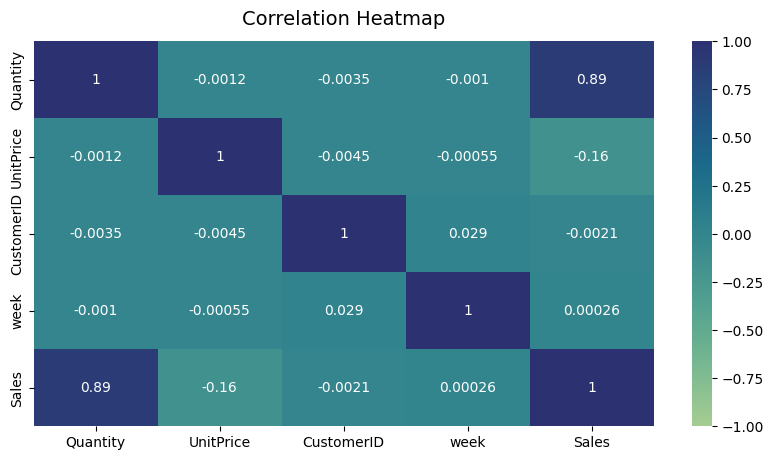

In [19]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("crest", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
plt.show()

correlation bewtween Quantity and Sales, but this is due to the direct relationship between the 2 features.

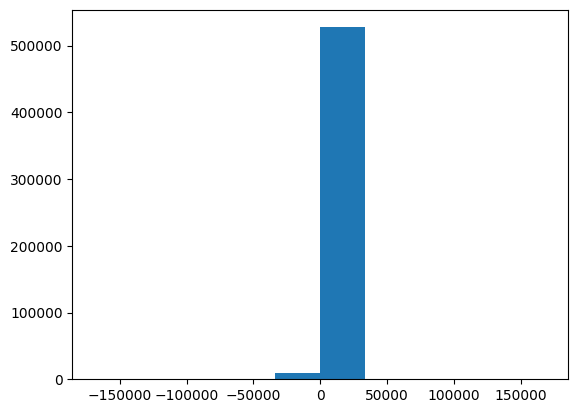

In [40]:
plt.hist(df['Sales'])
plt.show()

outliers in the data 

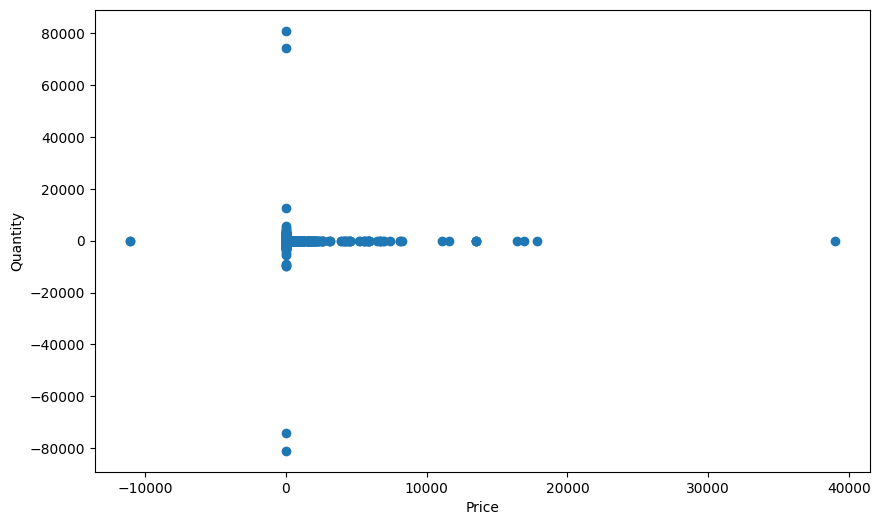

In [41]:
#Scatter plot of Price and Quantity
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['UnitPrice'], df['Quantity'])
ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
plt.show()

## 5-Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

In [20]:
# Group data by month and sum
df_by_month = df.groupby(['month']).sum().reset_index()

df_by_month.head()

,month,Quantity,UnitPrice,CustomerID,week,Sales
0,01,308281,172003.690,328108845.0,91319,558448.560
1,02,277374,126841.950,308233342.0,186847,497026.410
2,03,351165,170778.300,417520175.0,404444,682013.980
3,04,288237,128689.461,350844921.0,450484,492367.841
4,05,379652,190058.090,436143875.0,718209,722094.100


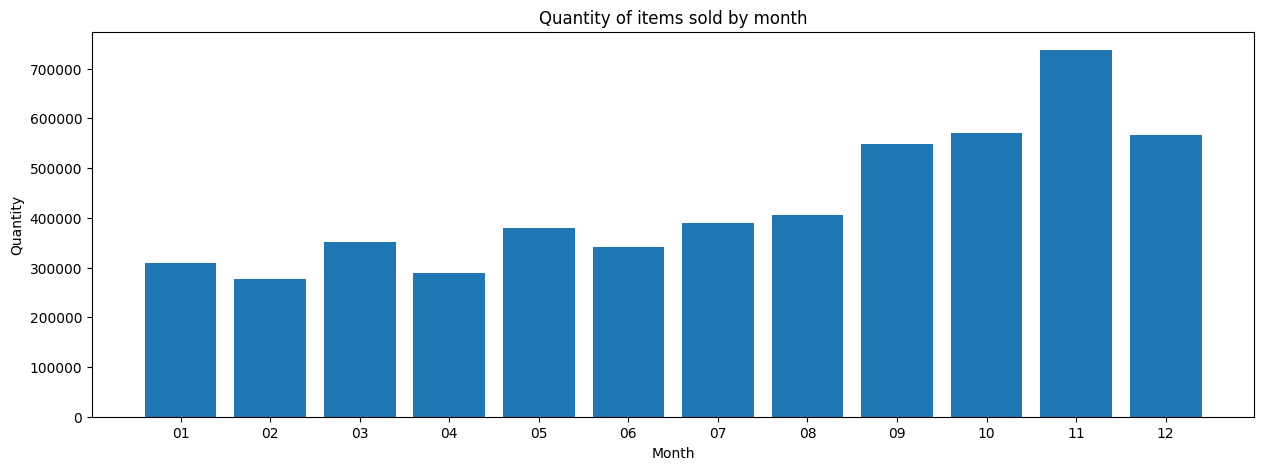

In [21]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_month['month'], height = df_by_month['Quantity'])
# addlabels(df_by_month['quarter'], df_by_month['Quantity'], df_by_month['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity of items sold by month')
plt.show()

In [22]:
# Group data by week and sum
df_by_week = df.groupby(['week']).sum().reset_index()
df_by_week.head()

,week,Quantity,UnitPrice,CustomerID,Sales
0,1,73400,60759.66,80429840.0,93493.71
1,2,85461,34523.48,72357440.0,190624.87
2,3,67842,38332.19,72651092.0,133476.74
3,4,69019,32203.63,86679824.0,118500.24
4,5,67532,28560.37,78620603.0,123498.86


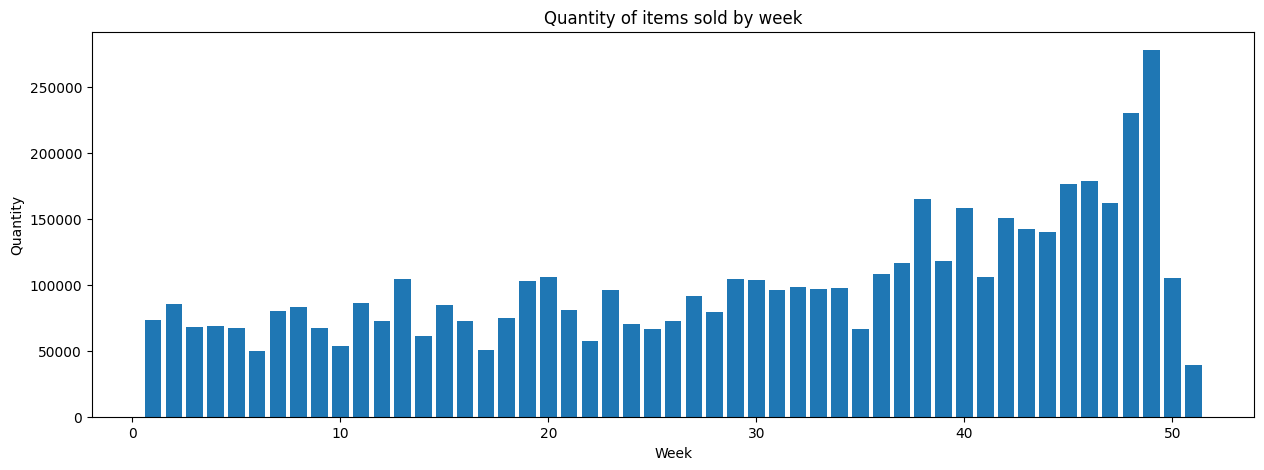

In [23]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_week['week'], height = df_by_week['Quantity'])
# addlabels(df_by_month['quarter'], df_by_month['Quantity'], df_by_month['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.title('Quantity of items sold by week')
plt.show()

In [24]:
# Group data by day and sum
df_by_dayofweek = df.groupby(['weekday']).sum().reset_index()
df_by_dayofweek.head()

,weekday,Quantity,UnitPrice,CustomerID,week,Sales
0,Friday,793106,394996.251,8.410658e+08,2526903,1537958.621
1,Monday,813178,533925.471,1.003218e+09,2907417,1584895.301
2,Sunday,462263,181971.301,9.526538e+08,1987460,798659.461
3,Thursday,1165600,424344.820,1.244651e+09,3140260,2108701.530
4,Tuesday,961133,519550.191,1.028613e+09,3036554,1965703.611


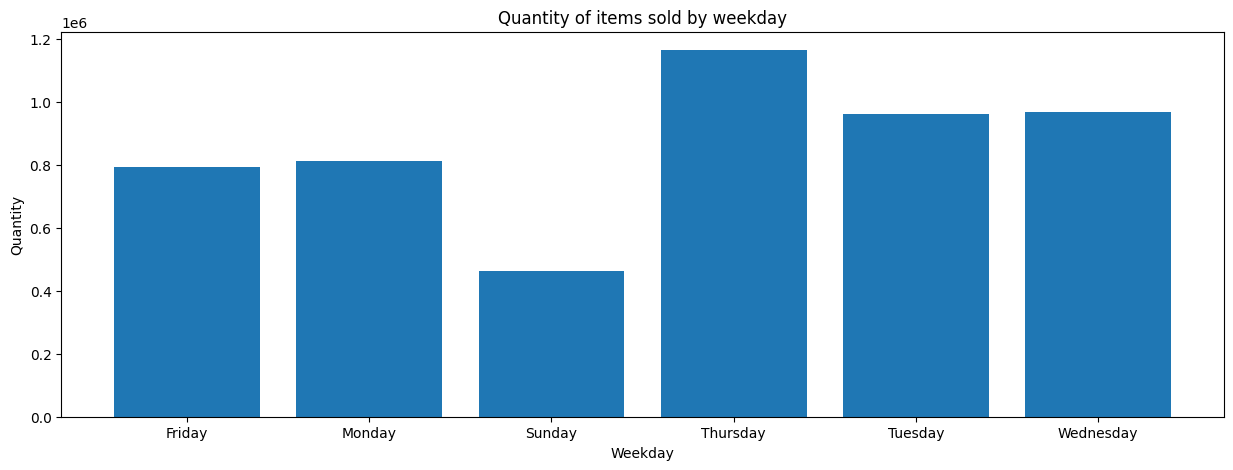

In [25]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_dayofweek['weekday'], height = df_by_dayofweek['Quantity'])
# addlabels(df_by_month['quarter'], df_by_month['Quantity'], df_by_month['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Weekday')
plt.ylabel('Quantity')
plt.title('Quantity of items sold by weekday')
plt.show()

In [26]:
# Group data
df_by_week_year = df.groupby(['week_year', 'year', 'week']).sum().reset_index()
df_by_week_year.head()

,week_year,year,week,Quantity,UnitPrice,CustomerID,Sales
0,2010-W48,2010,48,78647,38240.08,118958432.0,181088.89
1,2010-W49,2010,49,117965,143755.50,150595338.0,269518.44
2,2010-W50,2010,50,105191,50909.41,110543387.0,206397.01
3,2010-W51,2010,51,39235,26329.70,28635805.0,89719.27
4,2011-W01,2011,1,73400,60759.66,80429840.0,93493.71


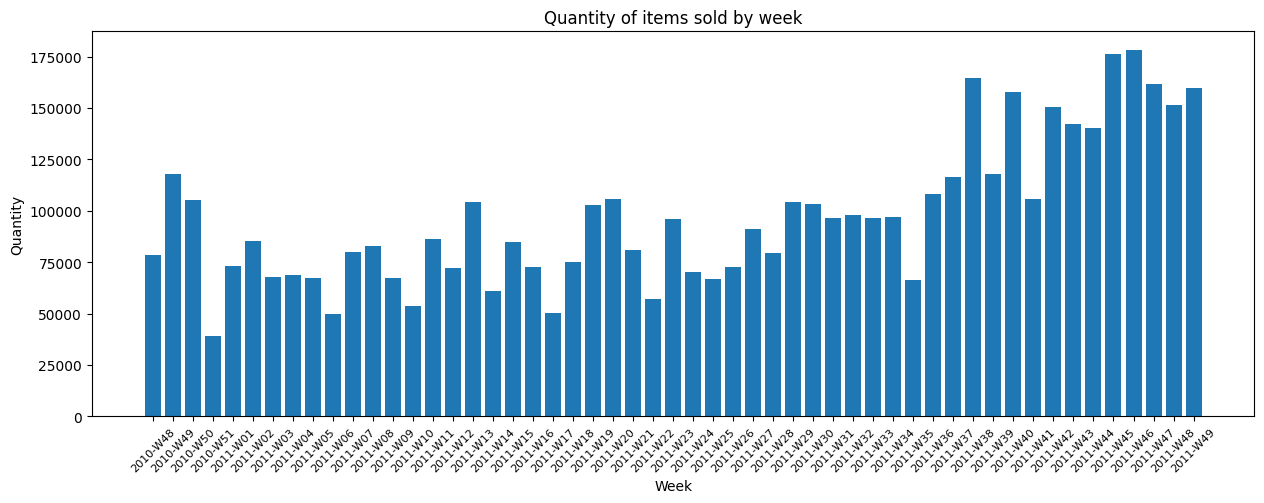

In [27]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_week_year['week_year'], height = df_by_week_year['Quantity'])
# addlabels(df_by_month['quarter'], df_by_month['Quantity'], df_by_month['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.title('Quantity of items sold by week')
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size
plt.show()

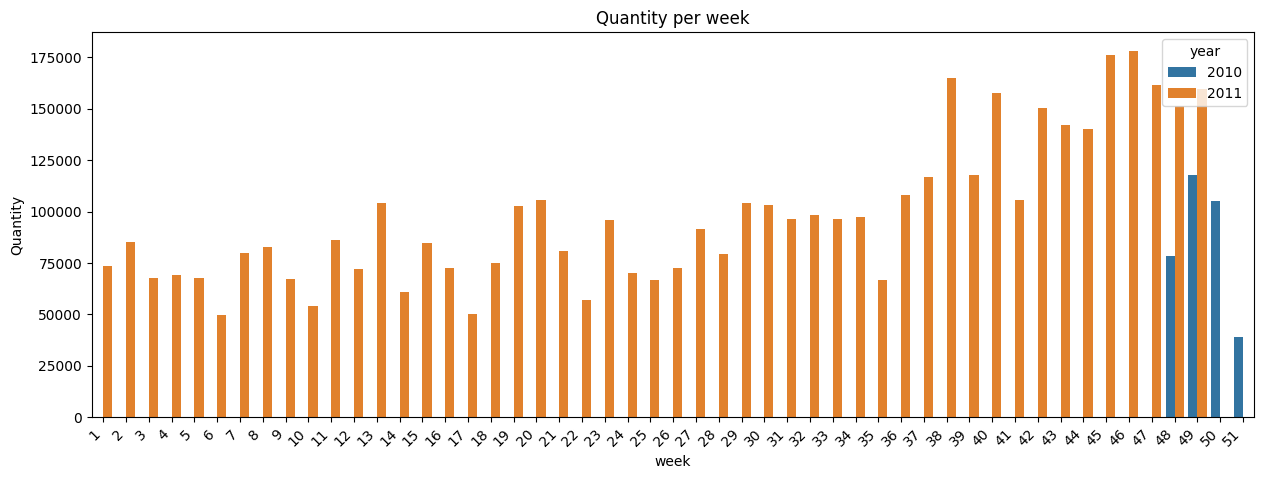

In [28]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_week_year,
    x = 'week',
    y = 'Quantity',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("week")
plt.ylabel("Quantity")
plt.title("Quantity per week")
plt.show()

## 6-Explore the top-selling products and countries based on the quantity sold.

In [29]:
# Group data by month and sum
df_by_country = df.groupby(['Country']).sum().reset_index()
df_by_country.head()

,Country,Quantity,UnitPrice,CustomerID,week,Sales
0,Australia,83643,4048.00,15680571.0,30709,137009.77
1,Austria,4827,1701.52,5021102.0,12568,10154.32
2,Bahrain,260,86.57,210027.0,379,548.40
3,Belgium,23152,7540.13,25718288.0,62106,40910.96
4,Brazil,356,142.60,408608.0,480,1143.60


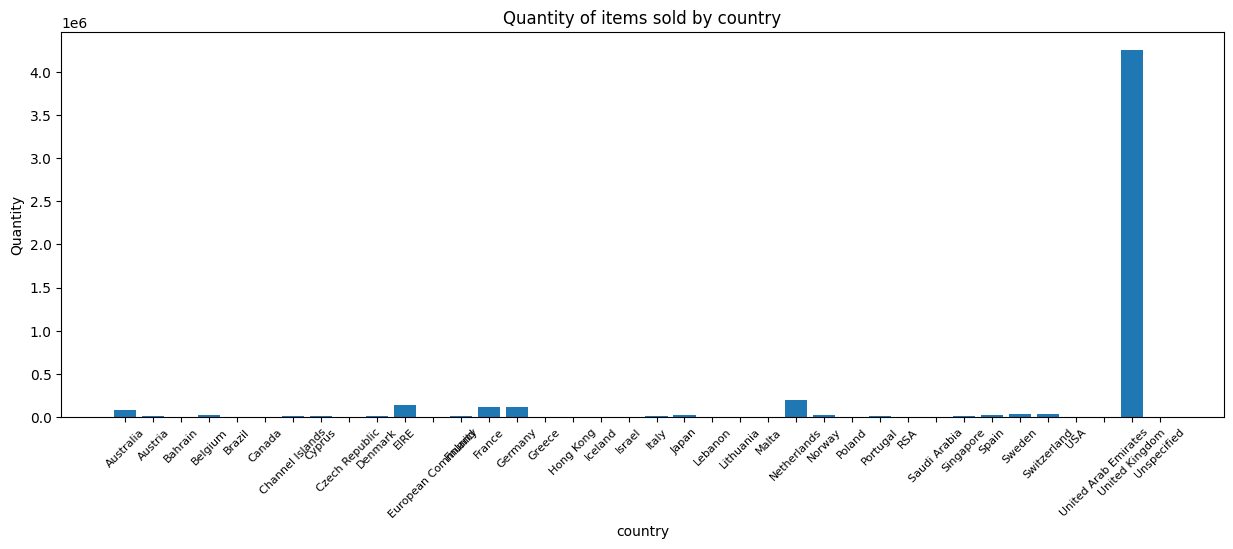

In [30]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_country['Country'], height = df_by_country['Quantity'])
# addlabels(df_by_month['quarter'], df_by_month['Quantity'], df_by_month['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('country')
plt.ylabel('Quantity')
plt.title('Quantity of items sold by country')
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size
plt.show()

In [31]:
df_by_country_sorted = df_by_country.sort_values(by='Quantity', ascending=False)
print(df_by_country_sorted.head(5))

           Country  Quantity    UnitPrice    CustomerID      week        Sales
36  United Kingdom   4250328  2233247.604  5.544907e+09  15089038  8167128.184
24     Netherlands    200128     6492.550  3.419054e+07     65340   284661.540
10            EIRE    142495    48400.370  1.102464e+08    256550   262993.380
14         Germany    117341    37633.440  1.198819e+08    280589   221509.470
13          France    110438    42985.980  1.074419e+08    260710   197317.110


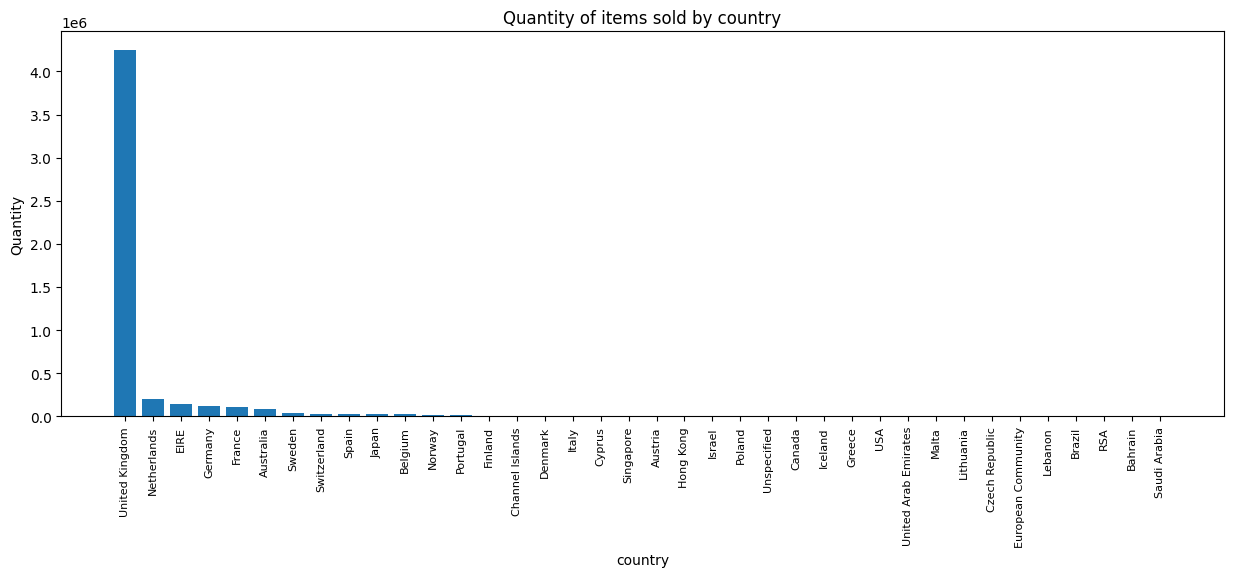

In [32]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_country_sorted['Country'], height = df_by_country_sorted['Quantity'])
# addlabels(df_by_month['quarter'], df_by_month['Quantity'], df_by_month['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('country')
plt.ylabel('Quantity')
plt.title('Quantity of items sold by country')
plt.xticks(rotation = 90, fontsize = 8) # Rotate x-axis labels and decrease font size
plt.show()

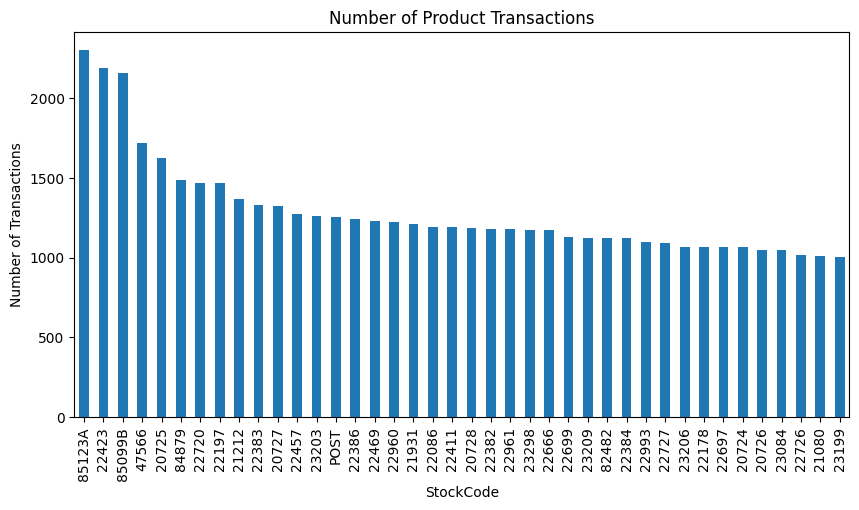

In [33]:
# Pareto of top products
df['StockCode'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Product Transactions")
plt.ylabel('Number of Transactions')
plt.xlabel('StockCode');

In [34]:
df['StockCode'].value_counts()[:20].rename_axis('Product unique_values').reset_index(name='counts').style.background_gradient()

,Product unique_values,counts
0,85123A,2301
1,22423,2192
2,85099B,2156
3,47566,1720
4,20725,1626
5,84879,1489
6,22720,1469
7,22197,1468
8,21212,1367
9,22383,1328


## 7-Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

<hr>

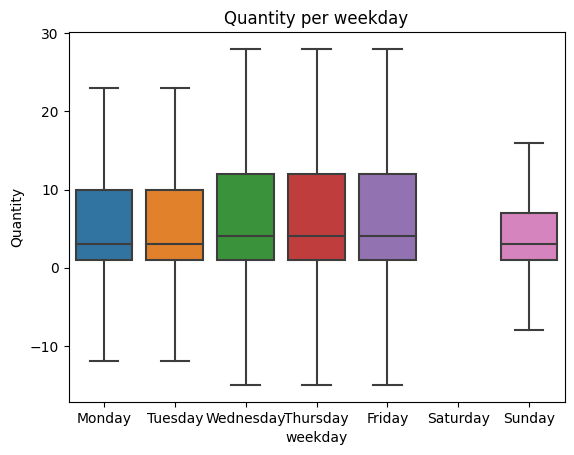

In [35]:
# Define order of days for the plot
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

# Create boxplots of strike counts for each day of week
g = sns.boxplot(data=df, 
            x='weekday',
            y='Quantity', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Quantity per weekday');

<AxesSubplot: xlabel='Quantity'>

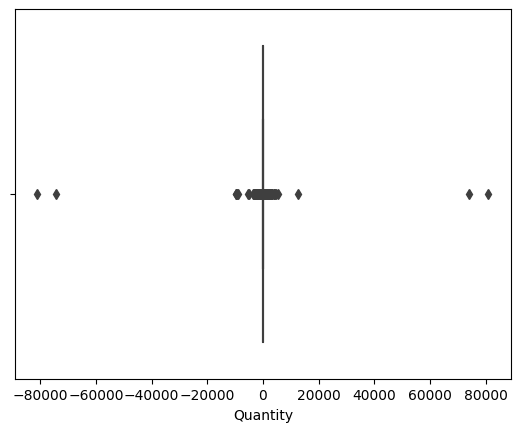

In [36]:
sns.boxplot(x=df['Quantity'])

Ther appear to be 2 transactions with very high quantities, with the same quantity returned the same day.  This appears to be returned items, recommend excluding these transactions.

<AxesSubplot: xlabel='UnitPrice'>

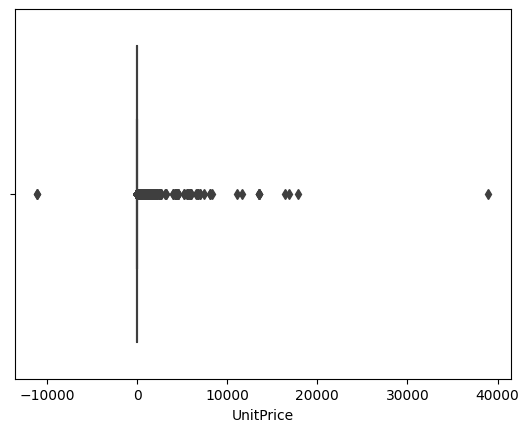

In [37]:
sns.boxplot(x=df['UnitPrice'])

2 outliers appear in `UnitPrice`
* First is a Manual transaction for stock code 'M' with unit price of 38,970
* Second, there are 2 negative transaction for stock code 'B' to 'adjust bad debt'

## 8-Conclusions

**Key takeaways**
* There are missing values for product `Description` and `CustomerId`, for now I will keep this in the data to discuss with customer before removing.
* There are some items in the transactions that might be removed.  For example, items listed as AMAZON FEE, Manual, DOTCOM POSTAGE, and POSTAGE. This makes it harder to compare products sales in the data.

* There appears to be 2 transactions with very high `Quantities`, with the same quantity returned the same day.  This appears to be returned items, recommend excluding these transactions.

2 outliers appear in `UnitPrice`
* First is a Manual transaction for stock code 'M' with unit price of 38,970
* Second, there are 2 negative transactions for `Stockcode` 'B' to 'adjust bad debt'


**Until those items above are removed, we can see that:**
* 📅Busiest month: November
* 📅Busiest weekday: Thursday
* 🔥Most transacted product qty: World War 2 Gliders Asstd Design (85123A)
* Most transacted stockcode (without description): 22197
* Highest unit price item: AMAZON FEE
* Highest product unit price: REGENCY CAKESTAND 3 TIER
* 🌍Majority of sales are in United Kingdom
* Avg transaction qty: 9.6
* Avg transaction unit price: 4.6
* Weekly qty has an upward trend in 2011